<a href="https://colab.research.google.com/github/rebelahsan/Mo-Ahsan-Ahmad/blob/main/Class_Model_for_Imbalanced_Datasets_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum() # No Null or missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# 2nd method for Checking missing values 1st method
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent], axis=1, keys=['total','percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = df.drop(['Class'], axis=1)
y= df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
#First we scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [ ]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

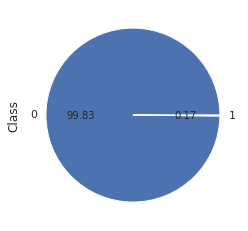

In [ ]:
#Plotting the pien chart in order to we could analyze the Fraud and Not Fraud data
y.value_counts().plot.pie(autopct='%.2f')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


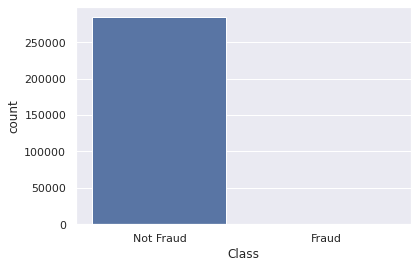

In [ ]:
df = sns.countplot(y)
df.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [ ]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (199364, 30) (199364,)
Test shape:  (85443, 30) (85443,)


In [ ]:
# f_reg() selecting the top k most relevant features(largest values) via the SelectKBest class
fs = SelectKBest(score_func=f_regression, k= 10)  
#relationship from training data
fs.fit(X_train , y_train)

SelectKBest(score_func=<function f_regression at 0x7f3ea1134320>)

In [ ]:
#transform train input data
X_train = fs.transform(X_train)
#transform test input data
X_test = fs.transform(X_test)
print(X_train, X_test, fs)

[[-0.65703607 -1.1279211   0.23304608 ... -0.38203184 -0.39699258
  -1.00460245]
 [-0.21028731 -0.3035769   0.65912982 ...  0.5382216   0.89141465
   1.85342912]
 [-1.2478402   0.134889    0.04152005 ...  0.76335874  0.07574269
   0.458373  ]
 ...
 [ 1.0797106   1.87799607  0.16587638 ... -0.22783551  1.87171585
  -0.33972857]
 [-0.05034264  0.31352872 -0.65276809 ...  0.84415051 -1.09638326
   0.43479747]
 [ 1.74646966  0.75205319  0.13694425 ... -1.29031384  0.57846602
  -1.01162121]] [[-0.09876928 -0.15882611  0.23643474 ... -0.32931125 -0.71373351
  -1.07465124]
 [ 0.87677661  0.01926221  0.25992545 ... -0.1181649   0.15176507
  -1.15020206]
 [ 0.63964574 -0.0897346   0.57089722 ...  0.66623264 -0.40513281
   0.03377802]
 ...
 [ 1.42803129  1.43684681  0.42509959 ...  0.92231348 -1.27944225
   0.41588291]
 [-0.43907239  0.16290245 -0.52534772 ...  0.49396635 -0.900651
   0.12408745]
 [ 0.38401979  0.47932058 -0.26618525 ...  0.2503777  -0.10131883
  -0.38450504]] SelectKBest(score_

In [ ]:
X_train.shape, X_test.shape

((199364, 10), (85443, 10))

##### X_train_fs and y_train_fs are the new variables after feature selection

In [ ]:
X_train_fs, y_train_fs = X_train, y_train #

In [ ]:
y_train_fs.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [ ]:
y_train_fs.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [ ]:
y_train_fs.shape

(199364,)

In [ ]:
X_train_fs.shape

(199364, 10)

In [ ]:
X_train_fs.shape, X_test.shape

((199364, 10), (85443, 10))

In [ ]:
y_test.shape

(85443,)

## Accuracy without Sampling

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=.3, random_state=2)
print("Train shape: ", X_train_fs.shape, y_train_fs.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (199364, 10) (199364,)
Test shape:  (85443, 10) (85443,)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,precision_score, log_loss

In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train_fs, y_train_fs)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train_fs, y_train_fs)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train_fs, y_train_fs)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_fs, y_train_fs)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train_fs, y_train_fs)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train_fs, y_train_fs)
    
    print('[0]LR Accuracy: ', log.score(X_train,y_train))
    print('[1]DT Accuracy: ', tree.score(X_train,y_train))
    print('[2]RF Accuracy: ', forest.score(X_train,y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train,y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train,y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train,y_train))
    
    return log,tree,forest,knn,gnb,svc
    
    

In [ ]:
model = models(X_train,y_train)

[0]LR Accuracy:  0.9992175116871652
[1]DT Accuracy:  1.0
[2]RF Accuracy:  0.9999197447884272
[3]KNN Accuracy:  0.9996438674986456
[4]NB Accuracy:  0.9912622138400112
[5]SVC Accuracy:  0.9996639313015389


In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[85294    14]
 [   58    77]]

Acc. Score:  0.9991573329588147

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.85      0.57      0.68       135

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443


Precision score:  0.8461538461538461
Recall score: 0.5703703703703704
f1_score:  0.6814159292035398
log_loss:  0.029104819526440746

Model 1

Confu. Matrix:
 [[85270    38]
 [   33   102]]

Acc. Score:  0.99916903666772

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.73      0.76      0.74       135

    accuracy                           1.00     85443
   macro avg       0.86      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443


**Lasso Logistic Regression(L1 Regularization)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_fs,y_train_fs, test_size=0.3, random_state=1)
from sklearn.linear_model import LogisticRegression
lrl1 = LogisticRegression(penalty = 'l1', solver = 'saga')

In [ ]:
lrl1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(penalty='l1', solver='saga')

In [ ]:
print('[0]LR Accuracy: ', lrl1.score(X_train,y_train))

[0]LR Accuracy:  0.9992117746535392


In [ ]:
print('\nConfu. Matrix:\n',confusion_matrix(y_test, lrl1.predict(X_test)))
print('\nAcc. Score: ',accuracy_score(y_test, lrl1.predict(X_test)))
print('\nClass. Report: \n',classification_report(y_test, lrl1.predict(X_test)))
print('\nPrecision score: ', precision_score(y_test, lrl1.predict(X_test)))
print('Recall score:',recall_score(y_test, lrl1.predict(X_test)))
print('f1_score: ',f1_score(y_test,lrl1.predict(X_test)))
print('log_loss: ',log_loss(y_test,lrl1.predict(X_test)))


Confu. Matrix:
 [[59692    13]
 [   43    62]]

Acc. Score:  0.99906370172212

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59705
           1       0.83      0.59      0.69       105

    accuracy                           1.00     59810
   macro avg       0.91      0.80      0.84     59810
weighted avg       1.00      1.00      1.00     59810


Precision score:  0.8266666666666667
Recall score: 0.5904761904761905
f1_score:  0.6888888888888889
log_loss:  0.03233877065510199


# Sampling

In [ ]:
from collections import Counter
Counter(y_train_fs)

Counter({0: 199007, 1: 357})

### Under_Sampling

##### RnadomUnderSampler, NearMiss, ENN, ClusterCentroid

###### i) RnadomUnderSampler

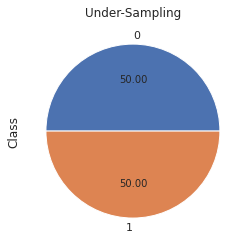

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto') # float
X_rus, y_rus = rus.fit_resample(X_train_fs,y_train_fs)
ax = y_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-Sampling")

In [ ]:
y_rus.value_counts()

0    357
1    357
Name: Class, dtype: int64

In [ ]:
print(Counter(y_rus))

Counter({0: 357, 1: 357})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.30, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lrl1 = LogisticRegression(penalty = 'l1', solver = 'saga')

In [ ]:
lrl1.fit(X_train, y_train)
print('[0]LR Accuracy: ', lrl1.score(X_train,y_train))

[0]LR Accuracy:  0.9519038076152304


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
print('\nConfu. Matrix:\n',confusion_matrix(y_test, lrl1.predict(X_test)))
print('\nAcc. Score: ',accuracy_score(y_test, lrl1.predict(X_test)))
print('\nClass. Report: \n',classification_report(y_test, lrl1.predict(X_test)))
print('\nPrecision score: ', precision_score(y_test, lrl1.predict(X_test)))
print('Recall score:',recall_score(y_test, lrl1.predict(X_test)))
print('f1_score: ',f1_score(y_test,lrl1.predict(X_test)))
print('log_loss: ',log_loss(y_test,lrl1.predict(X_test)))


Confu. Matrix:
 [[ 99   0]
 [ 16 100]]

Acc. Score:  0.9255813953488372

Class. Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        99
           1       1.00      0.86      0.93       116

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.94      0.93      0.93       215


Precision score:  1.0
Recall score: 0.8620689655172413
f1_score:  0.9259259259259259
log_loss:  2.5703275456677726


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=1)
# print("Train shape: ", X_train.shape, y_train.shape)
# print("Test shape: ", X_test.shape, y_test.shape)

In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    
    print('[0]LR Accuracy: ', log.score(X_train, y_train))
    print('[1]DT Accuracy: ', tree.score(X_train, y_train))
    print('[2]RF Accuracy: ', forest.score(X_train, y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train, y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train, y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train, y_train))
    
    return log,tree,forest,knn,gnb,svc


In [ ]:
model = models(X_train,y_train)

[0]LR Accuracy:  0.9539078156312625
[1]DT Accuracy:  1.0
[2]RF Accuracy:  0.9879759519038076
[3]KNN Accuracy:  0.9599198396793587
[4]NB Accuracy:  0.9458917835671342
[5]SVC Accuracy:  0.969939879759519


In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[ 98   1]
 [ 15 101]]

Acc. Score:  0.9255813953488372

Class. Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92        99
           1       0.99      0.87      0.93       116

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215


Precision score:  0.9901960784313726
Recall score: 0.8706896551724138
f1_score:  0.9266055045871561
log_loss:  2.570331264725587

Model 1

Confu. Matrix:
 [[ 91   8]
 [  9 107]]

Acc. Score:  0.9209302325581395

Class. Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        99
           1       0.93      0.92      0.93       116

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215


Precision score

###### ii) NearMiss

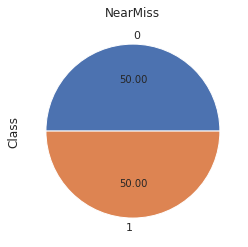

In [ ]:
from imblearn.under_sampling import NearMiss
nmiss = NearMiss(sampling_strategy='auto')
# rus = NearMiss(0.9)
X_nmiss,y_nmiss = nmiss.fit_resample(X_train_fs, y_train_fs)
ax = y_nmiss.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("NearMiss")

In [ ]:
y_nmiss.value_counts()

0    357
1    357
Name: Class, dtype: int64

In [ ]:
print(Counter(y_nmiss))

Counter({0: 357, 1: 357})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nmiss, y_nmiss, test_size=0.30, random_state=1)
from sklearn.linear_model import LogisticRegression
lrl1 = LogisticRegression(penalty = 'l1', solver = 'saga')
lrl1.fit(X_train, y_train)
print('[0]LR Accuracy: ', lrl1.score(X_train,y_train))

[0]LR Accuracy:  0.9478957915831663


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
print('\nConfu. Matrix:\n',confusion_matrix(y_test, lrl1.predict(X_test)))
print('\nAcc. Score: ',accuracy_score(y_test, lrl1.predict(X_test)))
print('\nClass. Report: \n',classification_report(y_test, lrl1.predict(X_test)))
print('\nPrecision score: ', precision_score(y_test, lrl1.predict(X_test)))
print('Recall score:',recall_score(y_test, lrl1.predict(X_test)))
print('f1_score: ',f1_score(y_test,lrl1.predict(X_test)))
print('log_loss: ',log_loss(y_test,lrl1.predict(X_test)))


Confu. Matrix:
 [[97  2]
 [21 95]]

Acc. Score:  0.8930232558139535

Class. Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89        99
           1       0.98      0.82      0.89       116

    accuracy                           0.89       215
   macro avg       0.90      0.90      0.89       215
weighted avg       0.91      0.89      0.89       215


Precision score:  0.979381443298969
Recall score: 0.8189655172413793
f1_score:  0.892018779342723
log_loss:  3.694853285013052


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nmiss,y_nmiss, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (499, 10) (499,)
Test shape:  (215, 10) (215,)


In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    
    print('[0]LR Accuracy: ', log.score(X_train, y_train))
    print('[1]DT Accuracy: ', tree.score(X_train, y_train))
    print('[2]RF Accuracy: ', forest.score(X_train, y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train, y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train, y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train, y_train))
    
    return log,tree,forest,knn,gnb,svc


In [ ]:
model = models(X_train,y_train)

[0]LR Accuracy:  0.9498997995991983
[1]DT Accuracy:  1.0
[2]RF Accuracy:  0.9959919839679359
[3]KNN Accuracy:  0.969939879759519
[4]NB Accuracy:  0.9679358717434869
[5]SVC Accuracy:  0.9799599198396793


In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[97  2]
 [17 99]]

Acc. Score:  0.9116279069767442

Class. Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        99
           1       0.98      0.85      0.91       116

    accuracy                           0.91       215
   macro avg       0.92      0.92      0.91       215
weighted avg       0.92      0.91      0.91       215


Precision score:  0.9801980198019802
Recall score: 0.853448275862069
f1_score:  0.9124423963133641
log_loss:  3.052271398596109

Model 1

Confu. Matrix:
 [[ 94   5]
 [  7 109]]

Acc. Score:  0.9441860465116279

Class. Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.96      0.94      0.95       116

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215


Precision score:  0.

###### iii) ENN

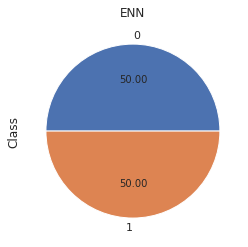

In [ ]:
from imblearn.under_sampling import NearMiss
enn = NearMiss()
X_enn,y_enn = enn.fit_resample(X_train_fs,y_train_fs)
ax = y_enn.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("ENN")

In [ ]:
y_enn.value_counts()

0    357
1    357
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enn,y_enn, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (499, 10) (499,)
Test shape:  (215, 10) (215,)


In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    
    print('[0]LR Accuracy: ', log.score(X_train, y_train))
    print('[1]DT Accuracy: ', tree.score(X_train, y_train))
    print('[2]RF Accuracy: ', forest.score(X_train, y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train, y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train, y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train, y_train))
    
    return log,tree,forest,knn,gnb,svc


In [ ]:
model = models(X_train,y_train)

[0]LR Accuracy:  0.9498997995991983
[1]DT Accuracy:  1.0
[2]RF Accuracy:  0.9959919839679359
[3]KNN Accuracy:  0.969939879759519
[4]NB Accuracy:  0.9679358717434869
[5]SVC Accuracy:  0.9799599198396793


In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[97  2]
 [17 99]]

Acc. Score:  0.9116279069767442

Class. Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        99
           1       0.98      0.85      0.91       116

    accuracy                           0.91       215
   macro avg       0.92      0.92      0.91       215
weighted avg       0.92      0.91      0.91       215


Precision score:  0.9801980198019802
Recall score: 0.853448275862069
f1_score:  0.9124423963133641
log_loss:  3.052271398596109

Model 1

Confu. Matrix:
 [[ 94   5]
 [  7 109]]

Acc. Score:  0.9441860465116279

Class. Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.96      0.94      0.95       116

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215


Precision score:  0.

##### iv) ClusterCentroid

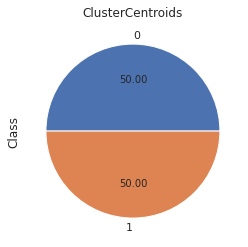

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cluster = ClusterCentroids()
X_cluster,y_cluster = cluster.fit_resample(X_train_fs,y_train_fs)
ax = y_cluster.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("ClusterCentroids")

In [ ]:
y_cluster.value_counts()

0    357
1    357
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cluster,y_cluster, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (499, 10) (499,)
Test shape:  (215, 10) (215,)


In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    
    print('[0]LR Accuracy: ', log.score(X_train, y_train))
    print('[1]DT Accuracy: ', tree.score(X_train, y_train))
    print('[2]RF Accuracy: ', forest.score(X_train, y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train, y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train, y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train, y_train))
    
    return log,tree,forest,knn,gnb,svc


In [ ]:
model = models(X_train,y_train)

[0]LR Accuracy:  0.935871743486974
[1]DT Accuracy:  1.0
[2]RF Accuracy:  0.9919839679358717
[3]KNN Accuracy:  0.9539078156312625
[4]NB Accuracy:  0.9078156312625251
[5]SVC Accuracy:  0.9579158316633266


In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[96  3]
 [21 95]]

Acc. Score:  0.8883720930232558

Class. Report: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        99
           1       0.97      0.82      0.89       116

    accuracy                           0.89       215
   macro avg       0.89      0.89      0.89       215
weighted avg       0.90      0.89      0.89       215


Precision score:  0.9693877551020408
Recall score: 0.8189655172413793
f1_score:  0.8878504672897196
log_loss:  3.855502475675103

Model 1

Confu. Matrix:
 [[87 12]
 [24 92]]

Acc. Score:  0.8325581395348837

Class. Report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.88      0.79      0.84       116

    accuracy                           0.83       215
   macro avg       0.83      0.84      0.83       215
weighted avg       0.84      0.83      0.83       215


Precision score:  0.884

## Random Over_Sampling

##### SMOTE, RandomOverSampler, SVMSMOTE, SMOTEN

###### i) SMOTE

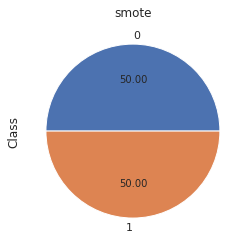

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train_fs,y_train_fs)
ax = y_smote.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("smote")

In [ ]:
y_smote.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (278609, 10) (278609,)
Test shape:  (119405, 10) (119405,)


In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    
    print('[0]LR Accuracy: ', log.score(X_train, y_train))
    print('[1]DT Accuracy: ', tree.score(X_train, y_train))
    print('[2]RF Accuracy: ', forest.score(X_train, y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train, y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train, y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train, y_train))
    
    return log,tree,forest,knn,gnb,svc


In [ ]:
model = models(X_train,y_train)

[0]LR Accuracy:  0.9386057162546795
[1]DT Accuracy:  1.0
[2]RF Accuracy:  0.9999964107405002
[3]KNN Accuracy:  0.9993359869925236
[4]NB Accuracy:  0.9235308263552147
[5]SVC Accuracy:  0.9937798132867208


In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[58415  1248]
 [ 6186 53556]]

Acc. Score:  0.9377413006155522

Class. Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     59663
           1       0.98      0.90      0.94     59742

    accuracy                           0.94    119405
   macro avg       0.94      0.94      0.94    119405
weighted avg       0.94      0.94      0.94    119405


Precision score:  0.977227939566455
Recall score: 0.8964547554484282
f1_score:  0.9351003090461474
log_loss:  2.150347653928721

Model 1

Confu. Matrix:
 [[59474   189]
 [   86 59656]]

Acc. Score:  0.9976969138645785

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59663
           1       1.00      1.00      1.00     59742

    accuracy                           1.00    119405
   macro avg       1.00      1.00      1.00    119405
weighted avg       1.00      1.00      1.00    119405




###### ii) Random Over_Sampling

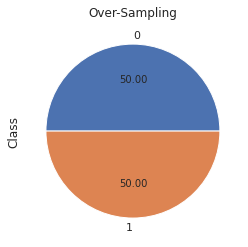

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() # float
X_ros,y_ros = ros.fit_resample(X_train_fs,y_train_fs)
ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-Sampling")

In [ ]:
y_ros.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

**Lasso Logistic Regression after Random Over_Sampling**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=1)
from sklearn.linear_model import LogisticRegression
lrl1 = LogisticRegression(penalty = 'l1', solver = 'saga')
lrl1.fit(X_train, y_train)
print('[0]LR Accuracy: ', lrl1.score(X_train,y_train))
print('/n')

print('\nConfu. Matrix:\n',confusion_matrix(y_test, lrl1.predict(X_test)))
print('\nAcc. Score: ',accuracy_score(y_test, lrl1.predict(X_test)))
print('\nClass. Report: \n',classification_report(y_test, lrl1.predict(X_test)))
print('\nPrecision score: ', precision_score(y_test, lrl1.predict(X_test)))
print('Recall score:',recall_score(y_test, lrl1.predict(X_test)))
print('f1_score: ',f1_score(y_test,lrl1.predict(X_test)))
print('log_loss: ',log_loss(y_test,lrl1.predict(X_test)))

[0]LR Accuracy:  0.9424713487360422
/n

Confu. Matrix:
 [[58492  1171]
 [ 5705 54037]]

Acc. Score:  0.9424144717557891

Class. Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     59663
           1       0.98      0.90      0.94     59742

    accuracy                           0.94    119405
   macro avg       0.94      0.94      0.94    119405
weighted avg       0.94      0.94      0.94    119405


Precision score:  0.978789305897696
Recall score: 0.904506042650062
f1_score:  0.9401826881252718
log_loss:  1.9889415252292337


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (278609, 10) (278609,)
Test shape:  (119405, 10) (119405,)


In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    
    print('[0]LR Accuracy: ', log.score(X_train, y_train))
    print('[1]DT Accuracy: ', tree.score(X_train, y_train))
    print('[2]RF Accuracy: ', forest.score(X_train, y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train, y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train, y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train, y_train))
    
    return log,tree,forest,knn,gnb,svc


In [ ]:
model = models(X_train,y_train)

[0]LR Accuracy:  0.9422201005710512
[1]DT Accuracy:  1.0
[2]RF Accuracy:  1.0
[3]KNN Accuracy:  0.9998600188795049
[4]NB Accuracy:  0.92647760840461
[5]SVC Accuracy:  0.996170260113636


In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[58477  1186]
 [ 5615 54127]]

Acc. Score:  0.9430425861563586

Class. Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     59663
           1       0.98      0.91      0.94     59742

    accuracy                           0.94    119405
   macro avg       0.95      0.94      0.94    119405
weighted avg       0.95      0.94      0.94    119405


Precision score:  0.9785583859128957
Recall score: 0.9060125205048375
f1_score:  0.9408891399765329
log_loss:  1.967247322845273

Model 1

Confu. Matrix:
 [[59627    36]
 [    0 59742]]

Acc. Score:  0.9996985050877266

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59663
           1       1.00      1.00      1.00     59742

    accuracy                           1.00    119405
   macro avg       1.00      1.00      1.00    119405
weighted avg       1.00      1.00      1.00    119405



###### iii) SVMSMOTE

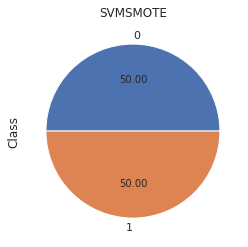

In [ ]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE()# float
X_svmsmote,y_svmsmote = svmsmote.fit_resample(X_train_fs,y_train_fs)
ax = y_svmsmote.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SVMSMOTE")

In [ ]:
y_svmsmote.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_svmsmote,y_svmsmote, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (278609, 10) (278609,)
Test shape:  (119405, 10) (119405,)


In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    
    print('[0]LR Accuracy: ', log.score(X_train, y_train))
    print('[1]DT Accuracy: ', tree.score(X_train, y_train))
    print('[2]RF Accuracy: ', forest.score(X_train, y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train, y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train, y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train, y_train))
    
    return log,tree,forest,knn,gnb,svc


In [ ]:
model = models(X_train,y_train)

[0]LR Accuracy:  0.9950755359661748
[1]DT Accuracy:  1.0
[2]RF Accuracy:  0.9999784644430008
[3]KNN Accuracy:  0.9997738766515081
[4]NB Accuracy:  0.9521372245691991
[5]SVC Accuracy:  0.9994867358915183


In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[59266   397]
 [  230 59512]]

Acc. Score:  0.9947489636112391

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     59663
           1       0.99      1.00      0.99     59742

    accuracy                           0.99    119405
   macro avg       0.99      0.99      0.99    119405
weighted avg       0.99      0.99      0.99    119405


Precision score:  0.9933732828122652
Recall score: 0.9961501121489069
f1_score:  0.9947597596342697
log_loss:  0.18136703018959757

Model 1

Confu. Matrix:
 [[59624    39]
 [    9 59733]]

Acc. Score:  0.9995980067836355

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59663
           1       1.00      1.00      1.00     59742

    accuracy                           1.00    119405
   macro avg       1.00      1.00      1.00    119405
weighted avg       1.00      1.00      1.00    119405

###### iv) SMOTEN

In [ ]:
from imblearn.over_sampling import SMOTEN
smoten = SMOTE()
X_smoten,y_smoten = smoten.fit_resample(X_train_fs,y_train_fs)
ax = y_smoten.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("smoten")

In [ ]:
y_smoten.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smoten,y_smoten, test_size = 0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (278609, 10) (278609,)
Test shape:  (119405, 10) (119405,)


In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    
    print('[0]LR Accuracy: ', log.score(X_train, y_train))
    print('[1]DT Accuracy: ', tree.score(X_train, y_train))
    print('[2]RF Accuracy: ', forest.score(X_train, y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train, y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train, y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train, y_train))
    
    return log,tree,forest,knn,gnb,svc


In [ ]:
model = models(X_train,y_train)

In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[59266   397]
 [ 7106 52636]]

Acc. Score:  0.9371634353670282

Class. Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     59663
           1       0.99      0.88      0.93     59742

    accuracy                           0.94    119405
   macro avg       0.94      0.94      0.94    119405
weighted avg       0.94      0.94      0.94    119405


Precision score:  0.9925140949974545
Recall score: 0.8810552040440561
f1_score:  0.9334692972733319
log_loss:  2.1703007137992105

Model 1

Confu. Matrix:
 [[59624    39]
 [ 7006 52736]]

Acc. Score:  0.9409991206398391

Class. Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     59663
           1       1.00      0.88      0.94     59742

    accuracy                           0.94    119405
   macro avg       0.95      0.94      0.94    119405
weighted avg       0.95      0.94      0.94    119405


# Hybrid Sampling

##### SMOTE+ENN , SMOTE+TL

###### SMOTE+ENN

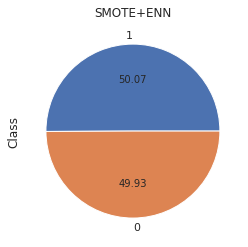

In [ ]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN()
X_smoteenn,y_smoteenn = smoteenn.fit_resample(X_train_fs,y_train_fs)
ax = y_smoteenn.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SMOTE+ENN")

In [ ]:
y_smoteenn.value_counts()

1    199007
0    198448
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smoteenn,y_smoteenn, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (278218, 10) (278218,)
Test shape:  (119237, 10) (119237,)


In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    
    print('[0]LR Accuracy: ', log.score(X_train, y_train))
    print('[1]DT Accuracy: ', tree.score(X_train, y_train))
    print('[2]RF Accuracy: ', forest.score(X_train, y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train, y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train, y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train, y_train))
    
    return log,tree,forest,knn,gnb,svc


In [ ]:
model = models(X_train,y_train)

[0]LR Accuracy:  0.9391232774299291
[1]DT Accuracy:  1.0
[2]RF Accuracy:  0.9999892170887578
[3]KNN Accuracy:  0.9999604626587784
[4]NB Accuracy:  0.9239481270083172
[5]SVC Accuracy:  0.9944036690652653


In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[58330  1165]
 [ 6056 53686]]

Acc. Score:  0.9394399389451261

Class. Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     59495
           1       0.98      0.90      0.94     59742

    accuracy                           0.94    119237
   macro avg       0.94      0.94      0.94    119237
weighted avg       0.94      0.94      0.94    119237


Precision score:  0.9787606424677764
Recall score: 0.8986307790164374
f1_score:  0.9369856797535627
log_loss:  2.091678219668864

Model 1

Confu. Matrix:
 [[59324   171]
 [   75 59667]]

Acc. Score:  0.9979368820081015

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59495
           1       1.00      1.00      1.00     59742

    accuracy                           1.00    119237
   macro avg       1.00      1.00      1.00    119237
weighted avg       1.00      1.00      1.00    119237



###### SMOTE+TL

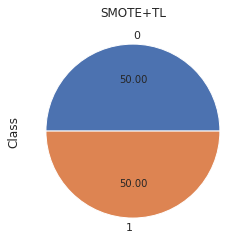

In [ ]:
from imblearn.combine import SMOTETomek
smotetl = SMOTETomek()
X_smotetl,y_smotetl = smotetl.fit_resample(X_train_fs,y_train_fs)
ax = y_smotetl.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SMOTE+TL")

In [ ]:
y_smotetl.value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smotetl,y_smotetl, test_size=0.3, random_state=1)
print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (278609, 10) (278609,)
Test shape:  (119405, 10) (119405,)


In [ ]:
def models(X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    
    print('[0]LR Accuracy: ', log.score(X_train, y_train))
    print('[1]DT Accuracy: ', tree.score(X_train, y_train))
    print('[2]RF Accuracy: ', forest.score(X_train, y_train))
    print('[3]KNN Accuracy: ', knn.score(X_train, y_train))
    print('[4]NB Accuracy: ', gnb.score(X_train, y_train))
    print('[5]SVC Accuracy: ', svc.score(X_train, y_train))
    
    return log,tree,forest,knn,gnb,svc


In [ ]:
model = models(X_train,y_train)

[0]LR Accuracy:  0.9391405159201605
[1]DT Accuracy:  1.0
[2]RF Accuracy:  0.9999964107405002
[3]KNN Accuracy:  0.9993288084735238
[4]NB Accuracy:  0.9231001152152299
[5]SVC Accuracy:  0.9938192951412194


In [ ]:
#Testing the Results
for i in range(len(model)):
    print("\nModel",i)
    print('\nConfu. Matrix:\n',confusion_matrix(y_test, model[i].predict(X_test)))
    print('\nAcc. Score: ',accuracy_score(y_test, model[i].predict(X_test)))
    print('\nClass. Report: \n',classification_report(y_test, model[i].predict(X_test)))
    print('\nPrecision score: ', precision_score(y_test, model[i].predict(X_test)))
    print('Recall score:',recall_score(y_test, model[i].predict(X_test)))
    print('f1_score: ',f1_score(y_test,model[i].predict(X_test)))
    print('log_loss: ',log_loss(y_test,model[i].predict(X_test)))


Model 0

Confu. Matrix:
 [[58405  1258]
 [ 6147 53595]]

Acc. Score:  0.9379841715171057

Class. Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     59663
           1       0.98      0.90      0.94     59742

    accuracy                           0.94    119405
   macro avg       0.94      0.94      0.94    119405
weighted avg       0.94      0.94      0.94    119405


Precision score:  0.9770659763367546
Recall score: 0.897107562518831
f1_score:  0.9353811248309263
log_loss:  2.1419592571322887

Model 1

Confu. Matrix:
 [[59466   197]
 [  101 59641]]

Acc. Score:  0.9975042921150705

Class. Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59663
           1       1.00      1.00      1.00     59742

    accuracy                           1.00    119405
   macro avg       1.00      1.00      1.00    119405
weighted avg       1.00      1.00      1.00    119405

